<a href="https://colab.research.google.com/github/CaueSiqueira/Taxa-CDI-Python/blob/main/PROJETOTAXACDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projeto - TAXA CDI**

Neste projeto, apresento um codigo que aprendi e desenvolvi através da EBAC.



Realizo os imports necessários, tambem a URL do site em JSON para que os dados sejam coletados.

In [ ]:
import os
import time
import json
from random import random
from datetime import datetime

import requests

URL = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.4392/dados'

# Captando a taxa CDI do site do BCB

try:
  response = requests.get(url=URL)
  response.raise_for_status()
except requests.HTTPError as exc:
  print("Dado não encontrado, continuando.")
  cdi = None
except Exception as exc:
  print("Erro, parando a execução.")
  raise exc
else:
  dado = json.loads(response.text)[-1]['valor']

# Criando a variável data e hora

for _ in range(0, 10):

  data_e_hora = datetime.now()
  data = datetime.strftime(data_e_hora, '%Y/%m/%d')
  hora = datetime.strftime(data_e_hora, '%H:%M:%S')

  cdi = float(dado) + (random() - 0.5)

  # Verificando se o arquivo "taxa-cdi.csv" existe

  if os.path.exists('./taxa-cdi.csv') == False:

    with open(file='./taxa-cdi.csv', mode='w', encoding='utf8') as fp:
      fp.write('data,hora,taxa\n')

  # Salvando dados no arquivo "taxa-cdi.csv"

  with open(file='./taxa-cdi.csv', mode='a', encoding='utf8') as fp:
    fp.write(f'{data},{hora},{cdi}\n')

  time.sleep(1)

print("Sucesso")

Sucesso


Nessa ultima etapa do código, importo o módulo CSV, argv, Pandas e Seaborn.

Por fim a taxa CDI será salva em um arquivo CSV, e é mostrado na tela um gráfico com as variações da taxa, tambem salvando a imagem em um arquivo PNG.

<ipython-input-4-04381e656c0b>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = grafico.set_xticklabels(labels=df['hora'], rotation=90)


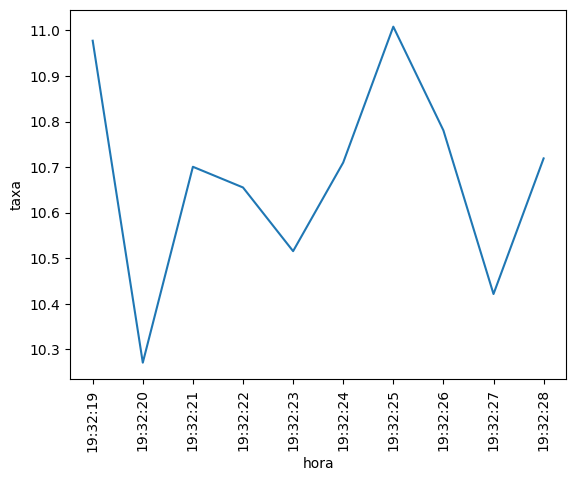

In [ ]:
import csv
from sys import argv

import pandas as pd
import seaborn as sns

# Extraindo as colunas hora e taxa

df = pd.read_csv('./taxa-cdi.csv')

# Salvando no grafico

grafico = sns.lineplot(x=df['hora'], y=df['taxa'])
_ = grafico.set_xticklabels(labels=df['hora'], rotation=90)
grafico.get_figure().savefig(f"{argv[1]}.png")
